Autor: Karol Koś

Tytuł zbioru: Hotel booking demand

Wybrane Hipotezy:
- Todo 
- Todo
- Todo

hotel                             - typ hotelu: Resort Hotel, City Hotel

is_canceled                       - wartość informująca czy rezerwacja została: odwołana - 1 czy nie - 0

lead_time                         - ilość dni od rejstracji zgłoszenia do przyjazdu klienta

arrival_date_year                 - rok przyjazdu

arrival_date_month                - miesiąc przyjazdu

arrival_date_week_number          - numer tygonia przyjazdu

arrival_date_day_of_month         - dzień przyjazdu

stays_in_weekend_nights           - ilość nocy zabookowanych w weekend

stays_in_week_nights              - ilość nocy zabookowanych w dzień

adults                            - ilość osób dorosłych

children                          - ilość dzieci

babies                            - ilość niemowlaków

meal                              - typ zamówionego posiłku: Undefined/SC – no meal package, BB – Bed & Breakfast, HB - Half boar (breakfast and one other meal – usually dinner)

country                           - kraj pochodzenia klienta w formacie ISO 3155–3:2013

market_segment                    - segment rynku: TA - biura podróży, TO - operatorzy wycieczek

distribution_channel              - kanał dystrybucji: TA - biura podróży, TO - operatorzy wycieczek

is_repeated_guest                 - czy jest gościem który odwiedził już wcześniej hotel

previous_cancellations            - czy jest gościem który anulował wcześniejsze rezerwacje

previous_bookings_not_canceled    - ilość rezerwacji nie odwołanych przez klienta do tego zarezerwowania

reserved_room_type                - zarezerwowany typ pokoju

assigned_room_type                - typ pokoju otrzymany w hotelu

booking_changes                   - liczba zmian dokonywanych momentu wpisania rezerwacji w PMS do momentu zameldowania lub anulacji

deposit_type                      - przedpłata: No Deposit - brak zaliczki, Non-Refundable - zaliczka w kwocie całego kosztu pobytu (bez zwrotów), Refundable - zaliczka w kwocie mniejszej od całego kosztu pobytu (w niektórych przypadkach ze zwrotem)

days_in_waiting_list              - liczba dni przez które rezerwacja znajdowała się na liście oczekujących, zanim została potwierdzona klientowi

customer_type                     - typ klienta: Contract - gdy z rezerwacją jest powiązany przydział lub inny rodzaj umowy, Group - gdy rezerwacja jest powiązana z grupą, Transient - gdy rezerwacja nie jest częścią umowy grupowej lub umowy i nie jest powiązana z inną rezerwacją przejściową, Transient-party - gdy rezerwacja ma charakter przejściowy, ale jest powiązana z co najmniej inną rezerwacją przejściową

adr                               - Average Daily Rate: suma wszystkich transakcji / ilość dni

required_car_parking_spaces       - ilość miejsc parkingowych zajętych przez klienta

total_of_special_requests         - ilość dodatkowych udogodnień o które poprosił klient

reservation_status                - status rezerwacji: Canceled - rezerwacja anulowana, Check-Out - wymeldowany z hotelu, No-Show - nie zjawił się w hotelu

reservation_status_date           - data wymeldowania z hotelu

1. Konfiguracja:

In [1]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install kaggle
!pip3 install numpy
!pip3 install seaborn
!pip3 install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!mkdir -p ~/.kaggle
#now put your kaggle.json inside ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!find . -name 'hotel-booking-demand.zip' | if read; then echo "File already downloaded"; else kaggle datasets download -d jessemostipak/hotel-booking-demand; fi;

File already downloaded


In [4]:
!find . -name 'hotel_bookings.csv' | if read; then echo "File already unzipped"; else unzip hotel-booking-demand.zip; fi;

File already unzipped


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
#import statsmodels.api as sm
from itertools import combinations

In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('hotel_bookings.csv')

2. Data cleaning i analiza danych:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [11]:
categorical_variables = df.select_dtypes(include=["object"]).columns
categorical_variables

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [12]:
numeric_variables = df.select_dtypes(include=[np.number]).columns
numeric_variables

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [13]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
df[df['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [15]:
df[df['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


2.1 Data cleaning

In [16]:
df.dropna(subset=['children'], inplace=True)

In [17]:
df['country'] = df['country'].fillna('Unknown')

In [18]:
df.drop(['agent','company'], axis=1, inplace=True)

In [19]:
df['children'] = df['children'].astype(int)

In [20]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  int64  
 11  babies                          119386 non-null  int64  
 12  meal                 

In [22]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


2.2 Analiza danych:

Macież korelacji:

In [23]:
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
correlation_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293177,0.016732,0.008132,-0.006084,-0.001783,0.024771,0.059990,0.005048,-0.032488,-0.084788,0.110140,-0.057355,-0.144371,0.054193,0.047622,-0.195492,-0.234706
lead_time,0.293177,1.000000,0.040093,0.126885,0.002234,0.085667,0.165799,0.119544,-0.037622,-0.020918,-0.124418,0.086040,-0.073552,0.000138,0.170083,-0.063126,-0.116461,-0.095688
arrival_date_year,0.016732,0.040093,1.000000,-0.540566,-0.000279,0.021489,0.030878,0.029674,0.054624,-0.013197,0.010332,-0.119833,0.029214,0.030855,-0.056506,0.197518,-0.013699,0.108585
arrival_date_week_number,0.008132,0.126885,-0.540566,1.000000,0.066824,0.018209,0.015559,0.025901,0.005518,0.010397,-0.030129,0.035502,-0.020902,0.005512,0.022935,0.075811,0.001924,0.026139
arrival_date_day_of_month,-0.006084,0.002234,-0.000279,0.066824,1.000000,-0.016370,-0.028192,-0.001539,0.014544,-0.000233,-0.006152,-0.027015,-0.000303,0.010601,0.022723,0.030189,0.008675,0.003094
stays_in_weekend_nights,-0.001783,0.085667,0.021489,0.018209,-0.016370,1.000000,0.498967,0.091889,0.045793,0.018483,-0.087242,-0.012775,-0.042716,0.063280,-0.054153,0.049323,-0.018556,0.072686
stays_in_week_nights,0.024771,0.165799,0.030878,0.015559,-0.028192,0.498967,1.000000,0.092983,0.044203,0.020191,-0.097247,-0.013993,-0.048744,0.096210,-0.002020,0.065219,-0.024861,0.068199
adults,0.059990,0.119544,0.029674,0.025901,-0.001539,0.091889,0.092983,1.000000,0.030447,0.018148,-0.146425,-0.006736,-0.107983,-0.051666,-0.008280,0.230690,0.014791,0.122855
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,-0.033273,0.324854,0.056253,0.081745
babies,-0.032488,-0.020918,-0.013197,0.010397,-0.000233,0.018483,0.020191,0.018148,0.024030,1.000000,-0.008943,-0.007501,-0.006551,0.083439,-0.010621,0.029183,0.037383,0.097893


Heatmapa współczynnika korelacji:

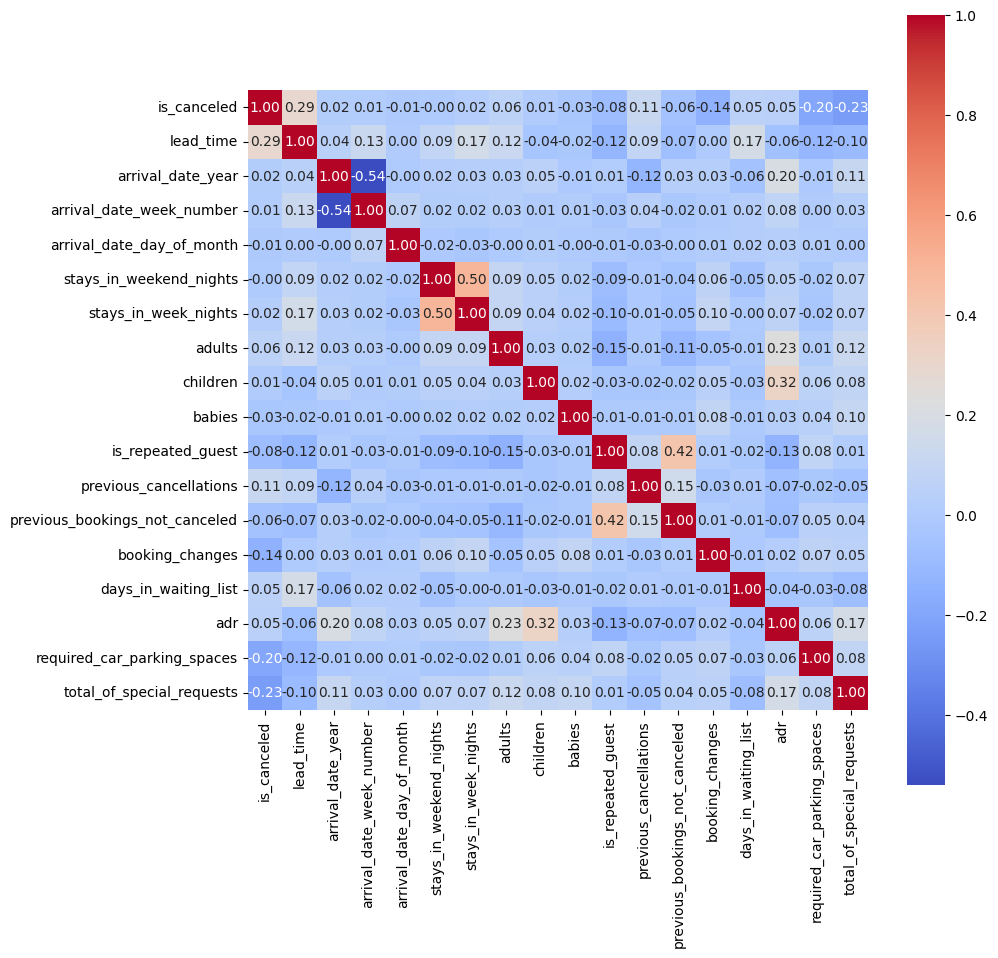

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap='coolwarm')
plt.show()

Heatmapa współczynnika determinacji R^2:

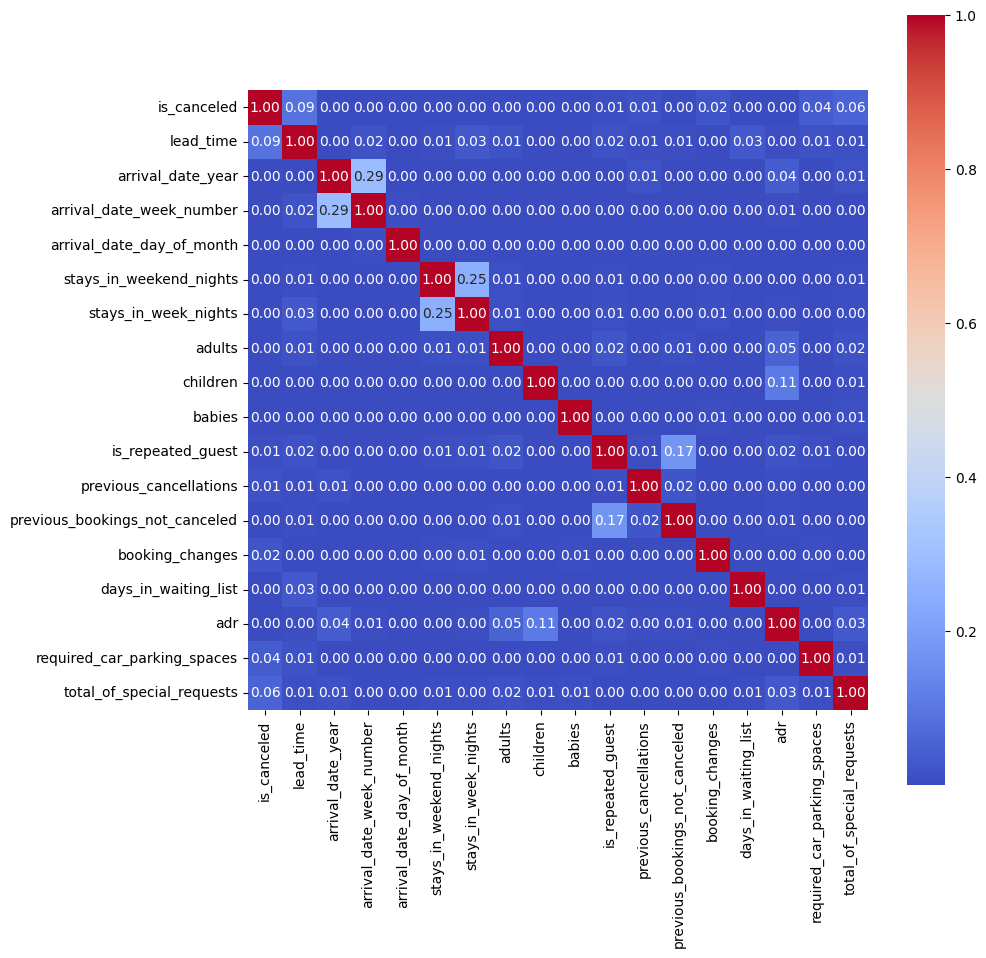

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix ** 2, annot=True, fmt=".2f", square=True, cmap='coolwarm')
plt.show()

Pary zmiennych z największsymi wartościami współczynnika determinacji:

In [26]:
corr_flat = (correlation_matrix**2).unstack().reset_index()
corr_flat.columns = ['Var1', 'Var2', 'R2']
corr_flat = corr_flat[corr_flat['Var1'] < corr_flat['Var2']]
top_10_pairs = corr_flat.sort_values('R2', ascending=False).head(10)

print(top_10_pairs)

                         Var1                            Var2        R2
56   arrival_date_week_number               arrival_date_year  0.292212
113      stays_in_week_nights         stays_in_weekend_nights  0.248968
192         is_repeated_guest  previous_bookings_not_canceled  0.174771
278                       adr                        children  0.105530
1                 is_canceled                       lead_time  0.085953
17                is_canceled       total_of_special_requests  0.055087
277                       adr                          adults  0.053218
272                       adr               arrival_date_year  0.039014
16                is_canceled     required_car_parking_spaces  0.038217
287                       adr       total_of_special_requests  0.029666


Chi test:

In [49]:
cat_columns = df.columns
column_pairs = list(combinations(cat_columns, 2))
results = []

for pair in column_pairs:
    contingency_table = pd.crosstab(df[pair[0]], df[pair[1]])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append({
        'pair': pair,
        'p-value': p,
        'chi2': chi2,
    })

results_df = pd.DataFrame(results)
results_df['p-value'] = results_df['p-value'].round(4)
results_df['chi2'] = results_df['chi2'].round(0).astype(int)
results_df = results_df[results_df['p-value'] <= 0.05]
results_df = results_df.sort_values('chi2', ascending=False)
results_df = results_df.sort_values('p-value', ascending=True)
print(results_df)

                                                  pair  p-value      chi2
428                     (adr, reservation_status_date)   0.0000  12358667
296                  (meal, total_of_special_requests)   0.0000      1841
376  (previous_bookings_not_canceled, required_car_...   0.0000      1847
123  (arrival_date_month, previous_bookings_not_can...   0.0000      1852
311             (country, required_car_parking_spaces)   0.0000      1903
189    (stays_in_weekend_nights, distribution_channel)   0.0000      1937
22                       (hotel, days_in_waiting_list)   0.0000      1939
336               (distribution_channel, deposit_type)   0.0000      1972
107     (arrival_date_year, total_of_special_requests)   0.0000      1994
149     (arrival_date_week_number, assigned_room_type)   0.0000      2006
291                               (meal, deposit_type)   0.0000      2092
321                  (market_segment, booking_changes)   0.0000      2200
186                    (stays_in_weeke